<a href="https://colab.research.google.com/github/sarimiro56/BigData_Python/blob/main/13_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys

!sudo add-apt-repository ppa:saiarcot895/chromium-beta #실행 결과에서 Enter 입력
!sudo apt remove chromium-browser
!sudo snap remove chromium
!sudo apt install chromium-browser

!pip3 install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu/ jammy main'
Description:
This PPA contains the latest Chromium Beta builds, with hardware video decoding enabled (hidden behind a flag), and support for Widevine (needed for viewing many DRM-protected videos) enabled.

== Hardware Video Decoding ==

To enable hardware video decoding, start Chromium with the --enable-features=VaapiVideoDecoder argument. To make this persistent, create a file at /etc/chromium-browser/customizations/92-vaapi-hardware-decoding with the following contents:

CHROMIUM_FLAGS="${CHROMIUM_FLAGS} --enable-features=VaapiVideoDecoder"

See also https://wiki.archlinux.org/title/Chromium#Hardware_video_acceleration for more information on VAAPI video decoding support.

=== Widevine Support ===

The packages in this PPA have support for Widevine inside Chromium enabled. However, you still need to copy some files from 

In [5]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

options = webdriver.ChromeOptions()
options.add_argument('--headless') #창이 나타나지 않도록 Headless 설정하기
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

webdriver_service = Service(executable_path=r'/usr/bin/chromedriver')
driver = webdriver.Chrome(service = webdriver_service, options=options)
url = 'http://www.korea.kr/news/top50List.do'
driver.get(url)

In [6]:
columns = ['순위', '기사 제목', '분류', '기사 작성일']
rank = []
title = []
journal = []
date = []
for i in range(1, 51):
  rank.append(i)
  title.append(driver.find_element(By.CSS_SELECTOR, '#container > div > div > div > div.news_top50 > ul > li:nth-child('+ str(i) +') > a > span.text > strong').text)
  journal.append(driver.find_element(By.CSS_SELECTOR, '#container > div > div > div > div.news_top50 > ul > li:nth-child('+ str(i) +') > a > span.text > span.date > span:nth-child(1)').text)
  date.append(driver.find_element(By.CSS_SELECTOR, '#container > div > div > div > div.news_top50 > ul > li:nth-child('+ str(i) +') > a > span.text > span.date > span:nth-child(2)').text)

In [8]:
import pandas as pd
df = pd.DataFrame({columns[0]: rank,
                   columns[1]: title,
                   columns[2]: journal,
                   columns[3]: date}, columns = columns)
df.head(50)

,순위,기사 제목,분류,기사 작성일
0,1,국민연금 ‘지급 보장’ 명문화…보험료율 올리되 세대별 인상 속도 차등,정책뉴스,2023.10.27
1,2,"공무원, 이런 거 있다는 말은 없었잖아...",영상,2023.10.26
2,3,2025년부터 의대정원 단계적 확대…4주간 대학별 증원 수요 조사,정책뉴스,2023.10.26
3,4,나 앞머리 잘랐는데 어때?,영상,2023.10.24
4,5,올해 마지막 ‘숙박세일 페스타’에서 3만 원 할인권 선착순 제공,정책뉴스,2023.10.24
5,6,초등 1~2학년 신체활동 64시간 더…‘체육’ 별도 교과로 분리 검토,정책뉴스,2023.10.30
6,7,소 럼피스킨병 바로알기,카드/한컷,2023.10.25
7,8,스마트팜 중동 수출 속도 붙는다…한-카타르 간 협력 MOU 구체화,정책뉴스,2023.10.25
8,9,7일 만에 65세 이상 코로나19 신규 백신접종자 100만 명 이상,정책뉴스,2023.10.26
9,10,가을을 배경 삼아 인생 사진 찍기 좋은 담양 여행,정책뉴스,2023.10.27


In [9]:
df.to_csv('top50_news.csv', index = False)

In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,744 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122392 files and dire

In [6]:
import csv

f = open('top50_news.csv', 'r')
rdr = csv.reader(f)
f.close

title = ''
for line in rdr:
  title = title + ' ' + line[1]
print(title)

 기사 제목 국민연금 ‘지급 보장’ 명문화…보험료율 올리되 세대별 인상 속도 차등 공무원, 이런 거 있다는 말은 없었잖아... 2025년부터 의대정원 단계적 확대…4주간 대학별 증원 수요 조사 나 앞머리 잘랐는데 어때? 올해 마지막 ‘숙박세일 페스타’에서 3만 원 할인권 선착순 제공 초등 1~2학년 신체활동 64시간 더…‘체육’ 별도 교과로 분리 검토 소 럼피스킨병 바로알기 스마트팜 중동 수출 속도 붙는다…한-카타르 간 협력 MOU 구체화 7일 만에 65세 이상 코로나19 신규 백신접종자 100만 명 이상 가을을 배경 삼아 인생 사진 찍기 좋은 담양 여행 경력경쟁채용시험의 모든 것…공무원 경채 비법 안내서 발간 ‘당조고추’ 식후 혈당상승 억제 기능성 원료로 인정 정부, 외국인 전용 유흥업소 인권침해 실태 등 합동점검 실시 보험사 미실현손익 상계 허용…일반주주들에 안정적 배당 기대 한-카타르, ‘포괄적 전략동반자관계’로 격상…사상 최대 규모 LNG선 계약 한-사우디 “수소경제·스마트시티 등에 상호 투자 적극 확대”…공동성명 채택 도둑은 공략대상이 아닌데요 - 1화 보험 계약전 이미 가입한 상품 비교 시스템 구축…동일상품 재가입 방지 K-콘텐츠 스타트업 투자유치 돕는다 [정책 바로보기] 럼피스킨병 ‘비상’… 한우·우유 수급도 차질 생기나? 접속자 몰려도 먹통 없는 정부 시스템 만든다…2030년까지 클라우드로 전환 럼피스킨병 백신 긴급도입…11월 10일까지 전국 접종 완료 ‘조용한 뼈도둑’ 골다공증 예방·관리를 위한 10대 생활수칙 국내 사망 원인 5위 뇌졸중, 이렇게 예방해요! 현직 공무원이 말하는 워라밸은?.ssul <ep.4> 많은 이들이 모르지만 기억해야 할 그 번호 국내 최초 장애예술인 표준공연장 ‘모두예술극장’ 개관 ‘소프라이즈’ 대한민국 한우세일…최대 50% 할인 행사 전사·순직 군경 유족, 국가 상대 ‘정신적 고통’ 위자료 청구 가능해진다 한국, ‘중동 2.0’ 전격 시동…“우리 국민과 기업에 새로운 기회의 창 열려” 정부, 럼피스킨병 발생에 총력 대

In [3]:
# 인덱스 0~5를 제외하고 6부터 슬라이싱하기
title = title[6:]
print(title)

‘지급 보장’ 명문화…보험료율 올리되 세대별 인상 속도 차등 공무원, 이런 거 있다는 말은 없었잖아... 2025년부터 의대정원 단계적 확대…4주간 대학별 증원 수요 조사 나 앞머리 잘랐는데 어때? 올해 마지막 ‘숙박세일 페스타’에서 3만 원 할인권 선착순 제공 초등 1~2학년 신체활동 64시간 더…‘체육’ 별도 교과로 분리 검토 소 럼피스킨병 바로알기 스마트팜 중동 수출 속도 붙는다…한-카타르 간 협력 MOU 구체화 7일 만에 65세 이상 코로나19 신규 백신접종자 100만 명 이상 가을을 배경 삼아 인생 사진 찍기 좋은 담양 여행 경력경쟁채용시험의 모든 것…공무원 경채 비법 안내서 발간 ‘당조고추’ 식후 혈당상승 억제 기능성 원료로 인정 정부, 외국인 전용 유흥업소 인권침해 실태 등 합동점검 실시 보험사 미실현손익 상계 허용…일반주주들에 안정적 배당 기대 한-카타르, ‘포괄적 전략동반자관계’로 격상…사상 최대 규모 LNG선 계약 한-사우디 “수소경제·스마트시티 등에 상호 투자 적극 확대”…공동성명 채택 도둑은 공략대상이 아닌데요 - 1화 보험 계약전 이미 가입한 상품 비교 시스템 구축…동일상품 재가입 방지 K-콘텐츠 스타트업 투자유치 돕는다 [정책 바로보기] 럼피스킨병 ‘비상’… 한우·우유 수급도 차질 생기나? 접속자 몰려도 먹통 없는 정부 시스템 만든다…2030년까지 클라우드로 전환 럼피스킨병 백신 긴급도입…11월 10일까지 전국 접종 완료 ‘조용한 뼈도둑’ 골다공증 예방·관리를 위한 10대 생활수칙 국내 사망 원인 5위 뇌졸중, 이렇게 예방해요! 현직 공무원이 말하는 워라밸은?.ssul <ep.4> 많은 이들이 모르지만 기억해야 할 그 번호 국내 최초 장애예술인 표준공연장 ‘모두예술극장’ 개관 ‘소프라이즈’ 대한민국 한우세일…최대 50% 할인 행사 전사·순직 군경 유족, 국가 상대 ‘정신적 고통’ 위자료 청구 가능해진다 한국, ‘중동 2.0’ 전격 시동…“우리 국민과 기업에 새로운 기회의 창 열려” 정부, 럼피스킨병 발생에 총력 대응…전국으로 백신 접종

In [7]:
!pip install konlpy

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 54.0 MB/s eta 0:00:00


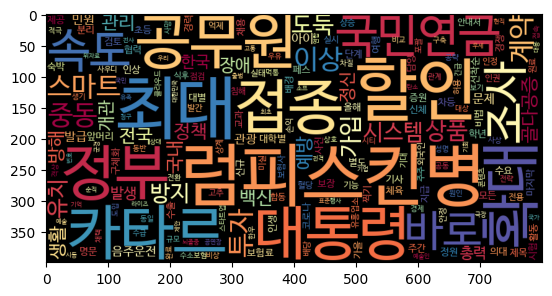

In [8]:
okt = Okt()
nouns = okt.nouns(title)
words = [n for n in nouns if len(n) > 1]
c = Counter(words)

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',\
               scale=2.0, colormap='Spectral')
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)